# Homework 3 Classification

In [494]:
import pandas as pd
import numpy as np
import seaborn as sbn

import matplotlib.pyplot as plt

In [495]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Preparation

In [496]:
selected_cols = ['Make', 'Model', 'Year', 'Engine HP' ,'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df = df[selected_cols]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.rename(columns={'msrp': 'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [497]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [498]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [499]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [500]:
df.fillna(0, inplace=True)

In [501]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

# Question 1

What is the most frequent observation (mode) for the column transmission_type?

    AUTOMATIC
    MANUAL
    AUTOMATED_MANUAL
    DIRECT_DRIVE


In [502]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

# Question 2

Create the **correlation matrix** for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

    engine_hp and year
    engine_hp and engine_cylinders
    highway_mpg and engine_cylinders
    highway_mpg and city_mpg


<Axes: >

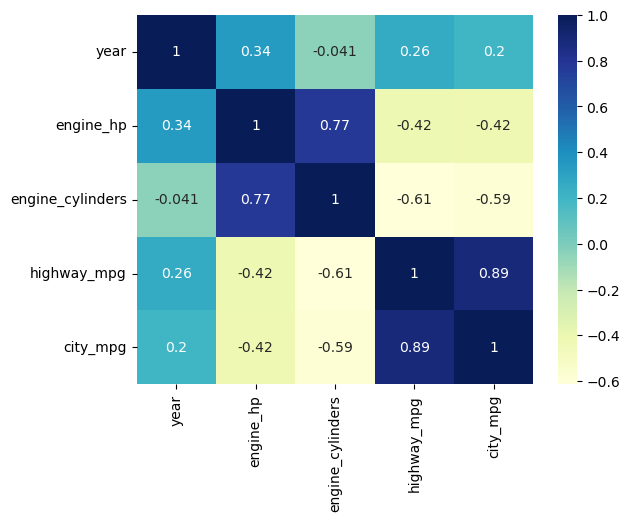

In [503]:
sbn.heatmap(df[numerical].corr(), cmap="YlGnBu", annot=True) 

# Make price binary

    Now we need to turn the price variable from numeric into a binary format.
    Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.


In [504]:
# make above_average variabel which is 1 if the price is above its mean value and 0 otherwise
df['above_average'] = df.price > df.price.mean()
df['above_average'] = df['above_average'].astype(int)

In [505]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


# Split the data

    Split your data in train/val/test sets with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value (price) is not in your dataframe.


In [506]:
feature_cols = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'above_average']

In [507]:
df = df[feature_cols]

In [508]:
from sklearn.model_selection import train_test_split

In [509]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [510]:
len(df_full_train), len(df_test)

(9531, 2383)

In [511]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [512]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [513]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0


In [514]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [515]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values

# Question 3

    Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
    Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

    make
    model
    transmission_type
    vehicle_style


In [516]:
from sklearn.metrics import mutual_info_score

In [517]:
round(mutual_info_score(df_train.above_average, df_train.make), 2)

0.24

In [518]:
round(mutual_info_score(df_train.above_average, df_train.model), 2)

0.46

In [519]:
round(mutual_info_score(df_train.above_average, df_train.transmission_type), 2)

0.02

In [520]:
round(mutual_info_score(df_train.above_average, df_train.vehicle_style), 2)

0.08

# Question 4

    Now let's train a logistic regression.
    Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
    Fit the model on the training dataset.
    
    To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

    0.60
    0.72
    0.84
    0.95


## One Hot Encoding

In [521]:
from sklearn.feature_extraction import DictVectorizer

In [522]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [523]:
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15}

In [524]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [525]:
X_train = dv.transform(train_dict)

In [526]:
X_train.shape

(7148, 943)

In [527]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

## Training Logistic Regression

In [528]:
from sklearn.linear_model import LogisticRegression

In [529]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [530]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [531]:
model.predict_proba(X_val)

array([[0.9912654 , 0.0087346 ],
       [0.00966721, 0.99033279],
       [0.99842511, 0.00157489],
       ...,
       [0.99854025, 0.00145975],
       [0.02821712, 0.97178288],
       [0.03751833, 0.96248167]])

In [532]:
y_pred = model.predict_proba(X_val)[:, 1]

In [533]:
y_pred

array([0.0087346 , 0.99033279, 0.00157489, ..., 0.00145975, 0.97178288,
       0.96248167])

In [534]:
score = y_pred > 0.5

In [535]:
accuracy = (y_val == score).mean()
round(accuracy, 2)

0.93

# Question 5

    Let's find the least useful feature using the feature elimination technique.
    Train a model with all these features (using the same parameters as in Q4).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

    year
    engine_hp
    transmission_type
    city_mpg

    Note: the difference doesn't have to be positive


In [536]:
minus_year_cols = ['make', 'model', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'above_average']
minus_engine_hp_cols = ['make', 'model', 'year', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'above_average']
minus_transmission_cols = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'vehicle_style', 'highway_mpg', 'city_mpg', 'above_average']
minus_city_mpg_cols = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'above_average']

## drop column year

In [537]:
df_year = df[minus_year_cols]
df_year.head()

,make,model,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,230.0,6.0,MANUAL,Convertible,28,18,0


In [538]:
df_full_train, df_test = train_test_split(df_year, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [539]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values

In [540]:
train_dict = df_train[minus_year_cols].to_dict(orient='records')

In [541]:
X_train = dv.transform(train_dict)

In [542]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [543]:
val_dict = df_val[minus_year_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [544]:
y_pred = model.predict_proba(X_val)[:, 1]
score = y_pred > 0.5
accuracy = (y_val == score).mean()
accuracy

0.9479647503147294

## drop column engine hp

In [545]:
df_engine_hp = df[minus_engine_hp_cols]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [546]:
df_full_train, df_test = train_test_split(df_engine_hp, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [547]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values

In [548]:
train_dict = df_train[minus_engine_hp_cols].to_dict(orient='records')

In [549]:
X_train = dv.transform(train_dict)

In [550]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [551]:
val_dict = df_val[minus_engine_hp_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [552]:
y_pred = model.predict_proba(X_val)[:, 1]
score = y_pred > 0.5
accuracy = (y_val == score).mean()
accuracy

0.9236256819135543

## Drop Column transmission_type

In [553]:
df_transmission_cols = df[minus_transmission_cols]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [554]:
df_full_train, df_test = train_test_split(df_transmission_cols, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [555]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values

In [556]:
train_dict = df_train[minus_transmission_cols].to_dict(orient='records')
X_train = dv.transform(train_dict)

val_dict = df_val[minus_transmission_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [557]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [558]:
y_pred = model.predict_proba(X_val)[:, 1]
score = y_pred > 0.5
accuracy = (y_val == score).mean()
accuracy

0.9437683592110785

## Drop column city_mpg

In [559]:
df_city_mpg = df[minus_city_mpg_cols]
df_city_mpg.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,0


In [560]:
df_full_train, df_test = train_test_split(df_city_mpg, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [561]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values

In [562]:
train_dict = df_train[minus_city_mpg_cols].to_dict(orient='records')
X_train = dv.transform(train_dict)

val_dict = df_val[minus_city_mpg_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [563]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [564]:
y_pred = model.predict_proba(X_val)[:, 1]
score = y_pred > 0.5
accuracy = (y_val == score).mean()
accuracy

0.946286193873269

# Question 6

    For this question, we'll see how to use a linear regression model from Scikit-Learn.
    We'll need to use the original column price. Apply the logarithmic transformation to this column.
    Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
    This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
    Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

    0
    0.01
    0.1
    1
    10

    Note: If there are multiple options, select the smallest alpha.


In [570]:
df = pd.read_csv('data.csv')
selected_cols = ['Make', 'Model', 'Year', 'Engine HP' ,'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df = df[selected_cols]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.rename(columns={'msrp': 'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [571]:
feature_cols_lin = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'price']

In [572]:
df_lin = df[feature_cols_lin]
df_lin.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [573]:
df_lin.fillna(0, inplace=True)

In [574]:
df_full_train, df_test = train_test_split(df_lin, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [575]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [583]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

## With 0 alpha

### Build Model linear Ridge

In [578]:
from sklearn.linear_model import Ridge

In [579]:
model = Ridge(alpha=0, solver='sag', random_state=42)
model.fit(X_train, y_train)

/home/fariz/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0, random_state=42, solver='sag')

In [586]:
y_pred = model.predict(X_val)
score = y_pred
accuracy = (y_val == score).mean()
accuracy

0.0

### Evaluate RMSE

In [587]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_val)

2818627039.6604986

## With 0.01 alpha

### Build Model linear Ridge

In [590]:
from sklearn.linear_model import Ridge

In [591]:
model = Ridge(alpha=0.01, solver='sag', random_state=42)
model.fit(X_train, y_train)

/home/fariz/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.01, random_state=42, solver='sag')

In [592]:
y_pred = model.predict(X_val)
score = y_pred
accuracy = (y_val == score).mean()
accuracy

0.0

### Evaluate RMSE

In [593]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_val)

2818628560.113851

## With 0.1 alpha

### Build Model linear Ridge

In [594]:
from sklearn.linear_model import Ridge

In [595]:
model = Ridge(alpha=0.1, solver='sag', random_state=42)
model.fit(X_train, y_train)

/home/fariz/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.1, random_state=42, solver='sag')

In [596]:
y_pred = model.predict(X_val)
score = y_pred
accuracy = (y_val == score).mean()
accuracy

0.0

### Evaluate RMSE

In [597]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_val)

2818642243.694463

## With 1 alpha

### Build Model linear Ridge

In [598]:
from sklearn.linear_model import Ridge

In [599]:
model = Ridge(alpha=1, solver='sag', random_state=42)
model.fit(X_train, y_train)

/home/fariz/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=1, random_state=42, solver='sag')

In [600]:
y_pred = model.predict(X_val)
score = y_pred
accuracy = (y_val == score).mean()
accuracy

0.0

### Evaluate RMSE

In [601]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_val)

2818779036.494967

## With 10 alpha

### Build Model linear Ridge

In [602]:
from sklearn.linear_model import Ridge

In [603]:
model = Ridge(alpha=10, solver='sag', random_state=42)
model.fit(X_train, y_train)

/home/fariz/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=10, random_state=42, solver='sag')

In [604]:
y_pred = model.predict(X_val)
score = y_pred
accuracy = (y_val == score).mean()
accuracy

0.0

### Evaluate RMSE

In [606]:
from sklearn.metrics import mean_squared_error

round(mean_squared_error(y_pred, y_val), 3)

2820142686.078